In [1]:
import pickle
# Load episode data from previous scraping exercise
with open('simpsons_scripts.pickle', 'rb') as eps_file:
    episodes = pickle.load(eps_file)

In [2]:
# Go through the seasons and add scripts to a list to facilitate vectorization
ep_scripts = []
ep_script_lookup = {}
for season in episodes:
    for episode in episodes[season]:
        ep_scripts.append(episodes[season][episode]['script'])
        ep_script_lookup[len(ep_scripts)-1] = {}
        ep_script_lookup[len(ep_scripts)-1]['season'] = season
        ep_script_lookup[len(ep_scripts)-1]['title'] = episode

In [16]:
# Sentiment analysis with nltk library

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import math
import string

ep_script = ep_scripts[100]
ep_script_sentences = sent_tokenize(ep_script)
ep_script_words = word_tokenize(ep_script)

# Remove punctuation and empty and make lowercase
ep_script_words = [''.join(c for c in s if s not in string.punctuation) for s in ep_script_words]
ep_script_words = [s.lower() for s in ep_script_words if s]

print('# sentences:', len(ep_script_sentences))
print('# words:', len(ep_script_words))

ep_sentiment_scores = []
sid = SentimentIntensityAnalyzer()

# Sliding window approach as described in: 
# "The emotional arcs of stories are dominated by six basic shapes", https://arxiv.org/abs/1606.07772
words_per_window = 100
starting_word_idx = 0
while starting_word_idx + words_per_window < len(ep_script_words):
    script_slice = ep_script_words[starting_word_idx:starting_word_idx+words_per_window]
    ss = sid.polarity_scores(' '.join(script_slice))
    ep_sentiment_scores.append(ss['compound'])
    print('Index: ' + str(starting_word_idx) + '\n\t\'' + ' '.join(script_slice) + '\'' + '\n\tScore: ' + str(ss['compound']))
    starting_word_idx += 1

[nltk_data] Downloading package punkt to /Users/allen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/allen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# sentences: 409
# words: 2823
Index: 0
	'chorus `` the simpsons `` bell ringing whistle blowing beeping `` jazzy solo tires screeching d'oh screams oh how can they imprison kids in school on a beautiful day like this they 're not imprisoning us bart they 're -- prison bus otto the regular school bus broke down so take a seat before i blow your heads off otto oh sorry this bus and i have sort of a shining thing going on. `` blues sighs deeply ahhh -- sighs this is what being a kid is all about hey huck what 's l-i-n-c-o-n doing here i do n't'
	Score: -0.296
Index: 1
	'`` the simpsons `` bell ringing whistle blowing beeping `` jazzy solo tires screeching d'oh screams oh how can they imprison kids in school on a beautiful day like this they 're not imprisoning us bart they 're -- prison bus otto the regular school bus broke down so take a seat before i blow your heads off otto oh sorry this bus and i have sort of a shining thing going on. `` blues sighs deeply ahhh -- sighs this is what 

Index: 169
	'the left side of my body yeah yeah now unfortunately our school clocks have been running fast all semester so today we all have to stay two extra hours to make up for the time we lost ha groaning sighs chittering engine rewing and to think i got all this after dropping out of the fourth grade laughs tires screech that does it i 'm outta here mrs. krabappel i have to go to the dentist i have a caraway seed caught under my bridgework my mom 's number 's there if you wan na check up on me that'
	Score: 0.6808
Index: 170
	'left side of my body yeah yeah now unfortunately our school clocks have been running fast all semester so today we all have to stay two extra hours to make up for the time we lost ha groaning sighs chittering engine rewing and to think i got all this after dropping out of the fourth grade laughs tires screech that does it i 'm outta here mrs. krabappel i have to go to the dentist i have a caraway seed caught under my bridgework my mom 's number 's there if y

	Score: 0.7184
Index: 442
	'be right here -- if i were a truant boy out for a good time i 'd be right here -- the springfield natural history museum chuckling you 're mine simpson look if i was under 1 7 i 'd be in school right yeah i guess you 're right enjoy boob-a-rama sir why there are no children here at the 4-h club either am i so out of touch no it 's the children who are wrong sold to the small man with the runny nose for 2.3 million snickers clears throat our next highest bid uh i believe'
	Score: 0.7184
Index: 443
	'right here -- if i were a truant boy out for a good time i 'd be right here -- the springfield natural history museum chuckling you 're mine simpson look if i was under 1 7 i 'd be in school right yeah i guess you 're right enjoy boob-a-rama sir why there are no children here at the 4-h club either am i so out of touch no it 's the children who are wrong sold to the small man with the runny nose for 2.3 million snickers clears throat our next highest bid uh i beli

	Score: 0.9595
Index: 664
	'fear what the -- laughs freddy honey i think something just dropped into the backseat i 'm not paying you to talk gim me the ball people the punch has been spiked laughs laughs that 's my nephew displaying the quimby wit that 's won the public 's heart happy birthday freddy and may all your disgraces be uh private yes all hear hear yes all hear hear and who are you little boy and who are you little boy i 'm one of your nephews you do n't see very often uh bart-bart hey mcbain i 'm a big'
	Score: 0.9595
Index: 665
	'what the -- laughs freddy honey i think something just dropped into the backseat i 'm not paying you to talk gim me the ball people the punch has been spiked laughs laughs that 's my nephew displaying the quimby wit that 's won the public 's heart happy birthday freddy and may all your disgraces be uh private yes all hear hear yes all hear hear and who are you little boy and who are you little boy i 'm one of your nephews you do n't see very often

	Score: 0.8612
Index: 946
	'a bite out of the big rice krispy square oh yeah and the waiter 's been brutally beaten laughs oh yeah and the waiter 's been brutally beaten laughs it says freddy quimby beat a waiter half to death those quimby children are so wild and rich i hope he finally gets what 's coming to him but freddy quimby 's innocent how do you know there were n't any witnesses chuckles oh yeah right you 'd think someone would 've seen something at a crowded party like that well they did n't okay they did n't it says so'
	Score: 0.8612
Index: 947
	'bite out of the big rice krispy square oh yeah and the waiter 's been brutally beaten laughs oh yeah and the waiter 's been brutally beaten laughs it says freddy quimby beat a waiter half to death those quimby children are so wild and rich i hope he finally gets what 's coming to him but freddy quimby 's innocent how do you know there were n't any witnesses chuckles oh yeah right you 'd think someone would 've seen something at a cr

	Score: 0.3612
Index: 1123
	'bart simpson i know you cut school yesterday and as soon as i can prove it i 'm shipping you off to the christian military reform school what he said oh i see if you testify skinner will know you skipped school well if freddy quimby did n't do it i 'm sure he 'll be found innocent by a fair and impartial jury oh jury duty i 'll see that quimby kid hang for this sighs i knew it was a bad idea to watch him open the mail let 's go over to the county courthouse live to'
	Score: 0.3612
Index: 1124
	'simpson i know you cut school yesterday and as soon as i can prove it i 'm shipping you off to the christian military reform school what he said oh i see if you testify skinner will know you skipped school well if freddy quimby did n't do it i 'm sure he 'll be found innocent by a fair and impartial jury oh jury duty i 'll see that quimby kid hang for this sighs i knew it was a bad idea to watch him open the mail let 's go over to the county courthouse live to kent'


Index: 1384
	'prove that freddy quimby is totally innocent first of all his accuser is a very shady character that waiter mr. lacoste not only was n't born in springfield he was n't even born in this country gasping murmuring it 's an exclusive. from now on you tell me everything uh freddy quimby was with me the entire night in question we were collecting canned goods for the starving people in uh you know one of them loser countries well that clears quimby he 's clearly innocent oh good my laundry is done you see lisa they do n't need my'
	Score: 0.7708
Index: 1385
	'that freddy quimby is totally innocent first of all his accuser is a very shady character that waiter mr. lacoste not only was n't born in springfield he was n't even born in this country gasping murmuring it 's an exclusive. from now on you tell me everything uh freddy quimby was with me the entire night in question we were collecting canned goods for the starving people in uh you know one of them loser countries well th

	Score: 0.7919
Index: 1635
	'i 'd still like to call freddy quimby to the stand so that we can all bask in his gentle decency he 's wealthy therefore inherently good woman yes innocent mr. quimby did you assault mr. lacoste of course not i love each and every living thing on god 's green earth well therefore you certainly would never lose your temper over something as trivial as the pronunciation of '' chowder '' that 's `` chowdah '' ''chowdah '' i 'll kill you i 'll kill all of you especially those of you in the jury gasps murmuring he 's'
	Score: 0.6621
Index: 1636
	''d still like to call freddy quimby to the stand so that we can all bask in his gentle decency he 's wealthy therefore inherently good woman yes innocent mr. quimby did you assault mr. lacoste of course not i love each and every living thing on god 's green earth well therefore you certainly would never lose your temper over something as trivial as the pronunciation of '' chowder '' that 's `` chowdah '' ''chowdah '' i 

	Score: 0.8734
Index: 1868
	'me what uh -- um yeah oh i just -- i just wanted to say how great it is to finally see some chicks on the bench mm keep up the good work toots laughs groans chuckles chicks on the bench why bother votin he 's guilty well we might as well make it official what does `` sequestered '' mean if the jury is deadlocked they are put in a hotel together so they ca n't communicate with the outside world what does `` deadlocked '' mean it 's when the jury ca n't agree on a verdict uh-huh'
	Score: 0.8734
Index: 1869
	'what uh -- um yeah oh i just -- i just wanted to say how great it is to finally see some chicks on the bench mm keep up the good work toots laughs groans chuckles chicks on the bench why bother votin he 's guilty well we might as well make it official what does `` sequestered '' mean if the jury is deadlocked they are put in a hotel together so they ca n't communicate with the outside world what does `` deadlocked '' mean it 's when the jury ca n't agree 

Index: 2314
	'it and he crushed our boy man ugh what a mess oh i do n't like this new director 's cut straining got it barn barney got what crashes ow. you 're stealing a table i 'm not stealin it hotels expect you to take a few things it 's a souvenir ah is that my necktie you 're wearing souvenir `` humming mom what if there 's a really bad crummy guy who 's going to jail but i know he 's innocent well bart your uncle arthur used to have a saying `` shoot 'em all and let'
	Score: -0.8127
Index: 2315
	'and he crushed our boy man ugh what a mess oh i do n't like this new director 's cut straining got it barn barney got what crashes ow. you 're stealing a table i 'm not stealin it hotels expect you to take a few things it 's a souvenir ah is that my necktie you 're wearing souvenir `` humming mom what if there 's a really bad crummy guy who 's going to jail but i know he 's innocent well bart your uncle arthur used to have a saying `` shoot 'em all and let god'
	Score: -0.6958
Index: 23

Index: 2538
	'kitchen when it all happened say it frenchy. say `` chowdah never okay you asked for it i 'm gon na enjoy this grunting snapping ow ooh ow ooh ow ooh and that 's what really happened this is an outrage i am not a clumsy clouseau-esque waiter i will -- whoa whoo whoo screaming ooh. ow. ow. ow. at least there were no big ones loud clamp ay how could you have seen all this bart were n't you supposed to be in school inhales i sorta skipped school i knew it i knew you 'd slip up sooner'
	Score: -0.6774
Index: 2539
	'when it all happened say it frenchy. say `` chowdah never okay you asked for it i 'm gon na enjoy this grunting snapping ow ooh ow ooh ow ooh and that 's what really happened this is an outrage i am not a clumsy clouseau-esque waiter i will -- whoa whoo whoo screaming ooh. ow. ow. ow. at least there were no big ones loud clamp ay how could you have seen all this bart were n't you supposed to be in school inhales i sorta skipped school i knew it i knew you 'd slip u

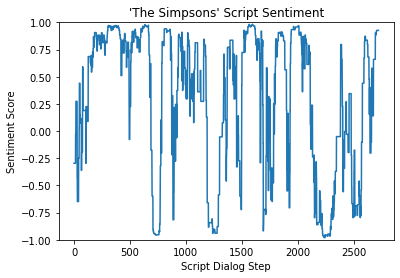

In [19]:
# Do some basic plotting of the sentiment scores

import matplotlib.pyplot as plt
%matplotlib inline

#print('# sentiment scores:', len(ep_sentiment_scores))
#print(ep_sentiment_scores)
# Set plot config
plt.title('\'The Simpsons\' Script Sentiment - Raw Scores')
axes = plt.gca()
axes.set_ylim([-1.0, 1.0])
plt.xlabel('Script Dialog Step')
plt.ylabel('Sentiment Score')
plt.plot(ep_sentiment_scores)
plt.show()

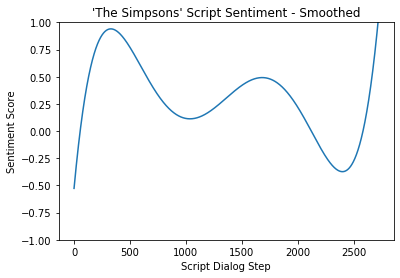

In [20]:
# Smooth out the chart

import numpy as np

def get_coeff_value(x, coeffs):
    ys = []
    for x_val in x:
        y = 0
        for i, coeff in enumerate(coeffs):
            y += coeff*x_val**i
        ys.append(y)
    
    return ys

ss_ids = [i for i in range(len(ep_sentiment_scores))]

# Set plot config
plt.title('\'The Simpsons\' Script Sentiment - Smoothed')
axes = plt.gca()
axes.set_ylim([-1.0, 1.0])
plt.xlabel('Script Dialog Step')
plt.ylabel('Sentiment Score')

# TODO: experiement with different degree values
z = np.polynomial.polynomial.polyfit(ss_ids, ep_sentiment_scores, 5)
plt.plot(get_coeff_value(ss_ids, z))
plt.show()